# Initial Data Exploration


In [2]:
# Change directory to repository root
%cd ../

/Users/danilandreev/Desktop/F23-PMLDL-Movie-Recommender-System


## 1\. Read Files as DataFrames


In [3]:
from pathlib import Path

dataset_dir = Path("data/raw/ml-100k")

### 1.1. `u.data`


In [4]:
"""
u.data -- The full u data set, 100000 ratings by 943 users on 1682 items.
          Each user has rated at least 20 movies.  Users and items are
          numbered consecutively from 1.  The data is randomly
          ordered. This is a tab separated list of 
          user id | item id | rating | timestamp. 
          The time stamps are unix seconds since 1/1/1970 UTC.
"""

from pandas import read_csv

# The time stamps are unix seconds since 1/1/1970 UTC
u_data_columns = ["user_id", "item_id", "rating", "timestamp"]
u_data = read_csv(dataset_dir / "u.data", sep="\t", header=None, names=u_data_columns)
u_data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### 1.2. `u.info`


In [5]:
"""
u.info -- The number of users, items, and ratings in the u data set.
"""
u_info_columns = ["number", "class"]
u_info = read_csv(dataset_dir / "u.info", sep=" ", header=None, names=u_info_columns)
u_info.head()

,number,class
0,943,users
1,1682,items
2,100000,ratings


### 1.3. `u.genre`


In [6]:
"""
u.genre -- A list of the genres.
"""
u_genre_columns = ["genre_name", "genre_id"]
u_genre = read_csv(
    dataset_dir / "u.genre",
    sep="|",
    header=None,
    names=u_genre_columns,
    index_col="genre_id",
)
u_genre.head()

,genre_name
genre_id,
0,unknown
1,Action
2,Adventure
3,Animation
4,Children's


### 1.4. `u.item`


In [19]:
"""
u.item -- Information about the items (movies); this is a tab separated list of
          movie id | movie title | release date | video release date |
          IMDb URL | unknown | Action | Adventure | Animation |
          Children's | Comedy | Crime | Documentary | Drama | Fantasy |
          Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
          Thriller | War | Western |
          The last 19 fields are the genres, a 1 indicates the movie
          is of that genre, a 0 indicates it is not; movies can be in
          several genres at once.
          The movie ids are the ones used in the u.data data set.
"""
u_item_columns = [
    "movie_id",
    "movie_title",
    "release_date",
    "video_release_date",
    "imdb_url",
]
u_item_columns += u_genre["genre_name"].to_list()
u_item = read_csv(
    dataset_dir / "u.item",
    sep="|",
    header=None,
    names=u_item_columns,
    index_col="movie_id",
    encoding="latin-1",
)
u_item.head()

,movie_title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### 1.5. `u.user`


In [37]:
"""
u.user -- Demographic information about the users; this is a tab
          separated list of
          user id | age | gender | occupation | zip code
          The user ids are the ones used in the u.data data set.
"""
u_user_columns = ["user_id", "age", "gender", "occupation", "zip_code"]
u_user = read_csv(
    dataset_dir / "u.user",
    sep="|",
    header=None,
    names=u_user_columns,
    index_col="user_id",
    encoding="latin-1",
)
u_user.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


### 1.6. `u.occupation`


In [10]:
"""
u.occupation -- A list of the occupations.
"""
u_occupation_columns = ["occupation_name"]
u_user = read_csv(
    dataset_dir / "u.occupation",
    header=None,
    names=u_occupation_columns,
    encoding="latin-1",
)
u_user.head()

,occupation_name
0,administrator
1,artist
2,doctor
3,educator
4,engineer


## 2\. Insights

/var/folders/w4/gxw2z9y93d970bhbn07krn9w0000gn/T/ipykernel_1197/3241949378.py:7: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  u_item.loc[:, 'release_date'] = pd.to_datetime(u_item['release_date'], errors='coerce')
/var/folders/w4/gxw2z9y93d970bhbn07krn9w0000gn/T/ipykernel_1197/3241949378.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  u_item.loc[:, 'release_date'] = pd.to_datetime(u_item['release_date'], errors='coerce')


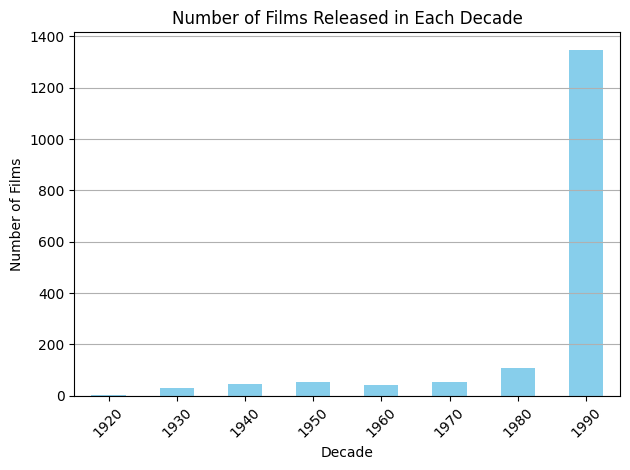

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'u_item'

# Convert 'release_date' column to datetime format
u_item.loc[:, 'release_date'] = pd.to_datetime(u_item['release_date'], errors='coerce')

# Drop rows with missing or invalid dates
u_item = u_item.dropna(subset=['release_date'])

# Extracting the year from the 'release_date' column
u_item['release_year'] = u_item['release_date'].dt.year

# Grouping movies by decade
u_item['decade'] = (u_item['release_year'] // 10) * 10

# Counting the number of films in each decade
films_per_decade = u_item.groupby('decade').size()

# Plotting the number of films released in each decade
# plt.figure(figsize=(10, 6))
films_per_decade.plot(kind='bar', color='skyblue')
plt.title('Number of Films Released in Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

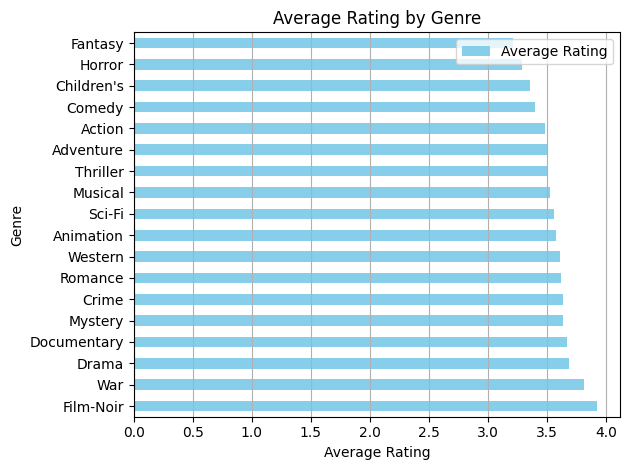

In [56]:
merged_data = pd.merge(u_data, u_item, left_on='item_id', right_on='movie_id', how='inner')

# Extracting genre columns from the merged DataFrame
genre_columns = ['Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
                 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Group by each genre and calculate the average rating for each genre
genre_ratings = {}
for genre in genre_columns:
    genre_ratings[genre] = merged_data[merged_data[genre] == 1]['rating'].mean()

# Create a DataFrame from genre_ratings dictionary
genre_ratings_df = pd.DataFrame(list(genre_ratings.items()), columns=['Genre', 'Average Rating'])

# Plotting the average ratings for each genre
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
genre_ratings_df.sort_values(by='Average Rating', ascending=False).plot(kind='barh', x='Genre', y='Average Rating', color='skyblue')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.grid(axis='x')  # Show grid on x-axis for better readability
plt.tight_layout()
plt.show()

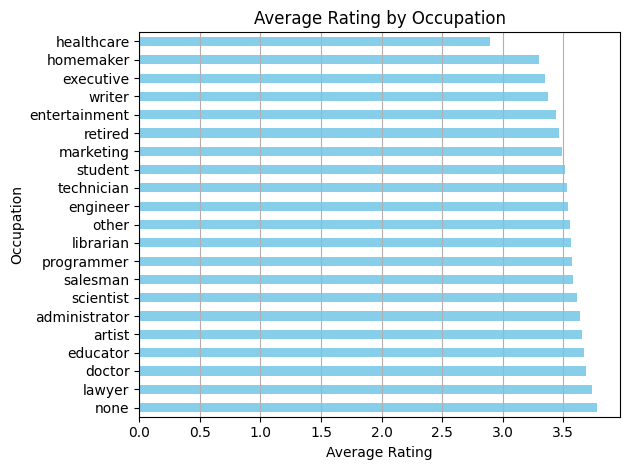

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'u_data' contains the user ratings and 'u_user' contains user information

# Merge 'u_data' and 'u_user' on the 'user_id' column
merged_data = pd.merge(u_data, u_user, left_on='user_id', right_index=True, how='inner')

# Group by each occupation and calculate the average rating for each occupation
occupation_ratings = merged_data.groupby('occupation')['rating'].mean()

# Plotting the average ratings for each occupation
# plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
occupation_ratings.sort_values(ascending=False).plot(kind='barh', color='skyblue')  # Use horizontal bar plot
plt.title('Average Rating by Occupation')
plt.xlabel('Average Rating')
plt.ylabel('Occupation')
plt.grid(axis='x')  # Show grid on x-axis for better readability
plt.tight_layout()
plt.show()


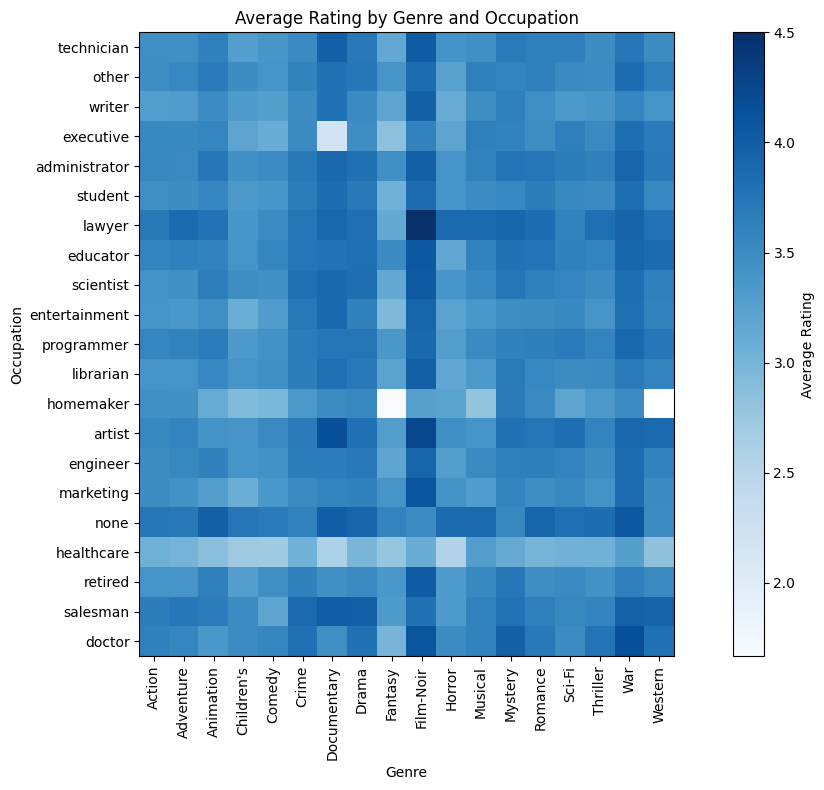

In [54]:
# Extracting unique genre columns from u_item
genre_columns = ['Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
                 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Extracting unique occupations from u_user
unique_occupations = u_user['occupation'].unique()

# Create an empty DataFrame to store the average ratings for each pair
ratings_data = []

# Loop through each occupation
for occupation in unique_occupations:
    # Filter merged_data for the specific occupation
    occupation_data = merged_data[merged_data['occupation'] == occupation]
    
    # Calculate the average rating for each genre for this occupation
    avg_ratings = []
    for genre in genre_columns:
        avg_rating = occupation_data[occupation_data[genre] == 1]['rating'].mean()
        avg_ratings.append(avg_rating)
    
    # Append the average ratings for this occupation to ratings_data
    ratings_data.append(avg_ratings)

# Create a DataFrame with the ratings data and columns as genre_columns
ratings_df = pd.DataFrame(ratings_data, columns=genre_columns, index=unique_occupations)

# Create an empty DataFrame to store the average ratings for each pair
ratings_data = []

# Loop through each occupation
for occupation in unique_occupations:
    # Filter merged_data for the specific occupation
    occupation_data = merged_data[merged_data['occupation'] == occupation]
    
    # Calculate the average rating for each genre for this occupation
    avg_ratings = []
    for genre in genre_columns:
        avg_rating = occupation_data[occupation_data[genre] == 1]['rating'].mean()
        avg_ratings.append(avg_rating)
    
    # Append the average ratings for this occupation to ratings_data
    ratings_data.append(avg_ratings)

# Create a DataFrame with the ratings data and columns as genre_columns
ratings_df = pd.DataFrame(ratings_data, columns=genre_columns, index=unique_occupations)

# Plotting the heatmap for average ratings by genre and occupation
plt.figure(figsize=(12, 8))
heatmap = plt.imshow(ratings_df, cmap='Blues', interpolation='nearest')
plt.colorbar(heatmap, label='Average Rating')
plt.title('Average Rating by Genre and Occupation')
plt.xlabel('Genre')
plt.ylabel('Occupation')
plt.xticks(ticks=range(len(genre_columns)), labels=genre_columns, rotation=90)
plt.yticks(ticks=range(len(unique_occupations)), labels=unique_occupations)
plt.tight_layout()
plt.show()


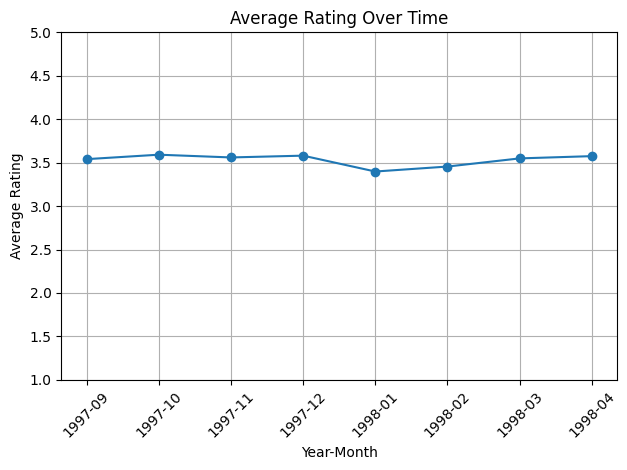

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'u_data' contains the user ratings with a 'timestamp' column

# Convert the 'timestamp' column to datetime
u_data['timestamp'] = pd.to_datetime(u_data['timestamp'], unit='s')

# Extracting year and month from the timestamp
u_data['year_month'] = u_data['timestamp'].dt.to_period('M')

# Calculate the average rating for each year-month
average_rating_per_month = u_data.groupby('year_month')['rating'].mean()

# Convert 'Period' index to string for plotting
average_rating_per_month.index = average_rating_per_month.index.astype(str)

# Plotting the trend of average ratings over time
plt.plot(average_rating_per_month.index, average_rating_per_month.values, marker='o', linestyle='-')
plt.title('Average Rating Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)

# Set y-axis limits to display the entire score range
plt.ylim(1, 5)  # Assuming the rating scale is from 1 to 5
plt.tight_layout()
plt.show()
